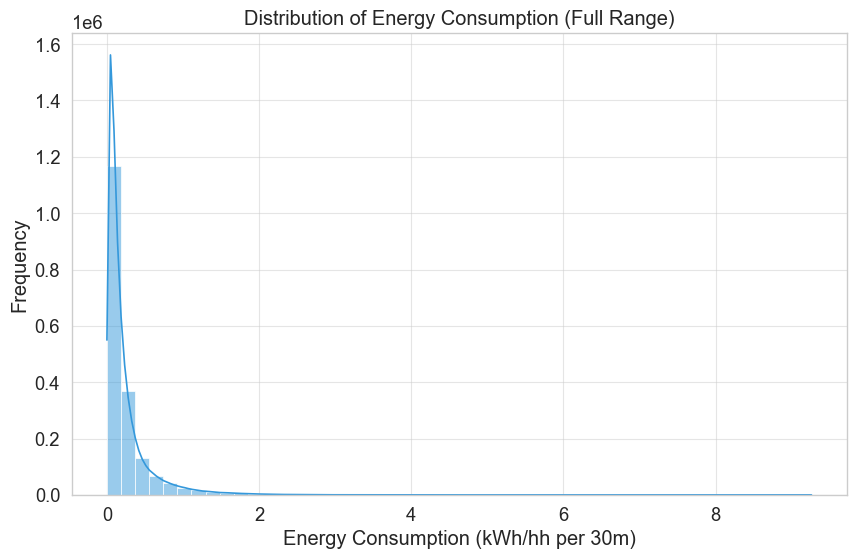

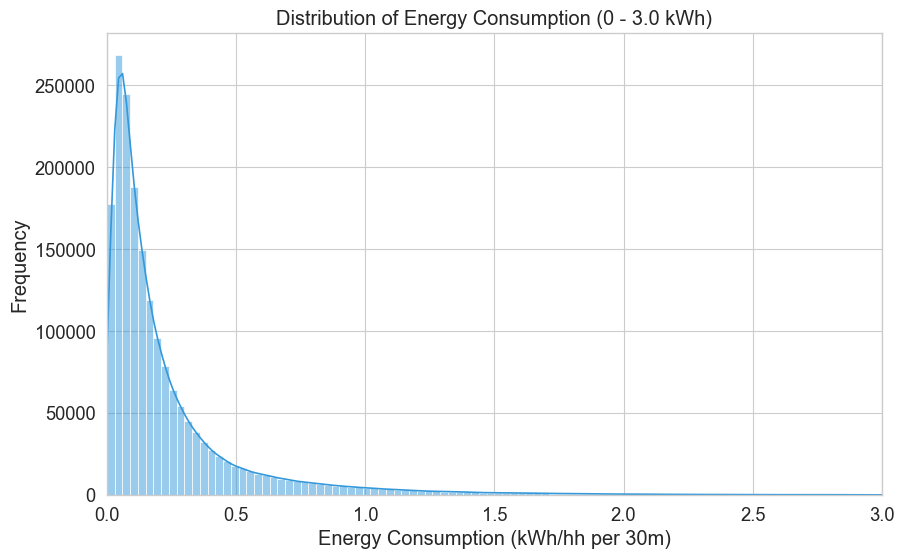

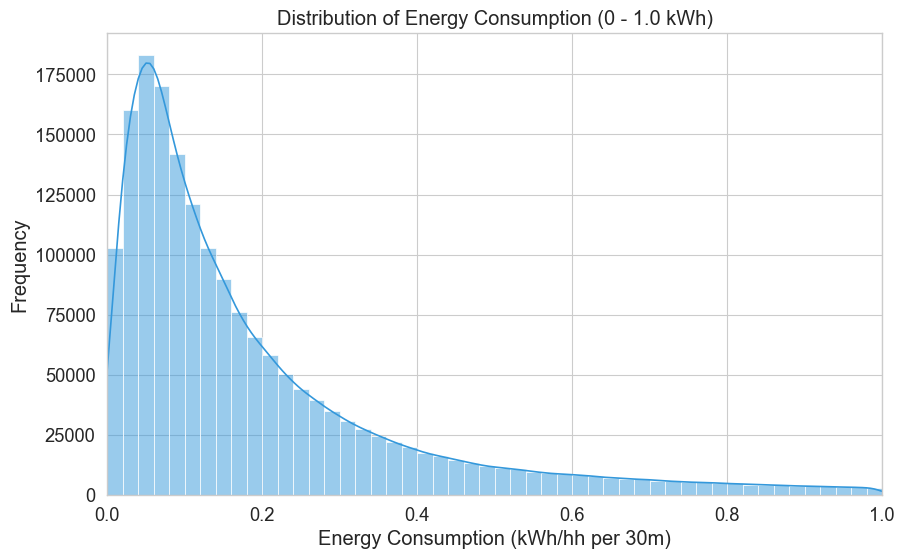

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CONFIGURATION
DATA_PATH = '../experiments/output.csv' 
SAVE_PATH = '../latex/figures/'
os.makedirs(SAVE_PATH, exist_ok=True)

sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
df = pd.read_csv(DATA_PATH)

# --- PLOT 1: Full Distribution of Energy Consumption data
plt.figure(figsize=(10, 6))

sns.histplot(
    df['KWH/hh (per half hour) '], 
    bins=50, 
    kde=True,                 # Adds the smooth line
    color="#3498db",          # blue color
    edgecolor="white",        
    linewidth=0.5             # Ensures bars are solid color
)

plt.title("Distribution of Energy Consumption (Full Range)")
plt.xlabel("Energy Consumption (kWh/hh per 30m)")
plt.ylabel("Frequency")
plt.grid(True, which="major", ls="-", alpha=0.5)

plt.savefig(f"{SAVE_PATH}distribution_full_range.png", dpi=300, bbox_inches='tight')
plt.show()

# --- PLOT 2: Zoomed (up to 3kWh)
plt.figure(figsize=(10, 6))
subset = df[df['KWH/hh (per half hour) '] <= 3.0]

sns.histplot(
    subset['KWH/hh (per half hour) '], 
    bins=100, 
    kde=True, 
    color="#3498db",
    edgecolor="white", 
    linewidth=0.5
)

plt.title("Distribution of Energy Consumption (0 - 3.0 kWh)")
plt.xlabel("Energy Consumption (kWh/hh per 30m)")
plt.ylabel("Frequency")
plt.xlim(0, 3.0)

plt.savefig(f"{SAVE_PATH}distribution_zoomed_to_3kwh.png", dpi=300, bbox_inches='tight')
plt.show()


# --- PLOT3: Zoomed (up to 1kWh)
plt.figure(figsize=(10, 6))
subset = df[df['KWH/hh (per half hour) '] <= 1.0]

sns.histplot(
    subset['KWH/hh (per half hour) '], 
    bins=50, 
    kde=True, 
    color="#3498db",
    edgecolor="white", 
    linewidth=0.5
)

plt.title("Distribution of Energy Consumption (0 - 1.0 kWh)")
plt.xlabel("Energy Consumption (kWh/hh per 30m)")
plt.ylabel("Frequency")
plt.xlim(0, 1.0)

plt.savefig(f"{SAVE_PATH}distribution_zoomed_to_1kwh.png", dpi=300, bbox_inches='tight')
plt.show()

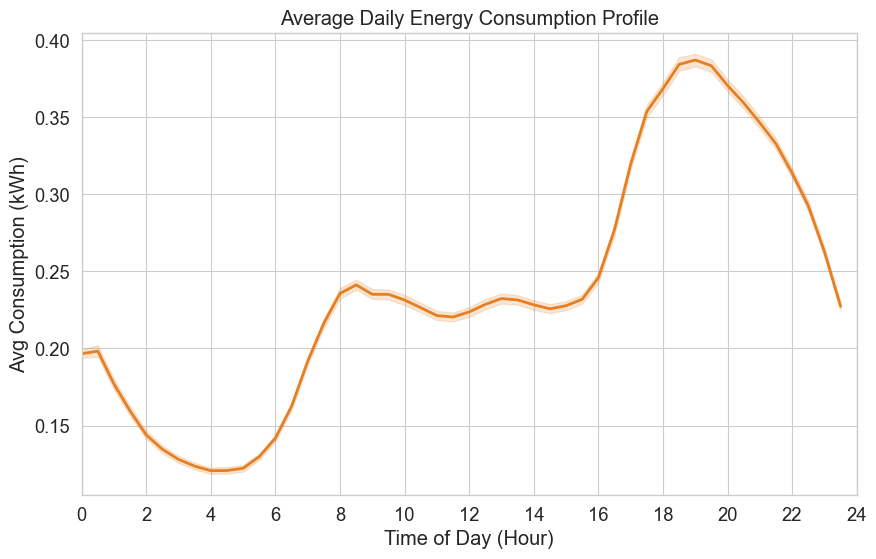

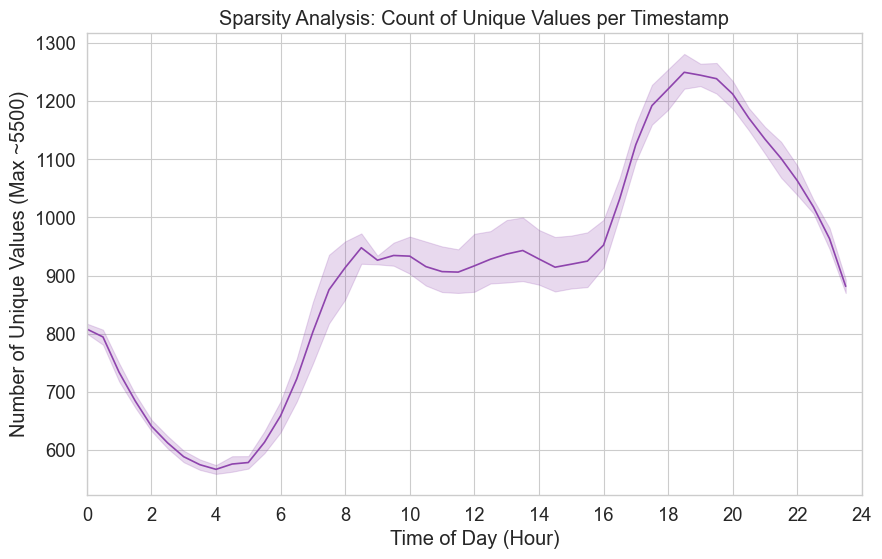

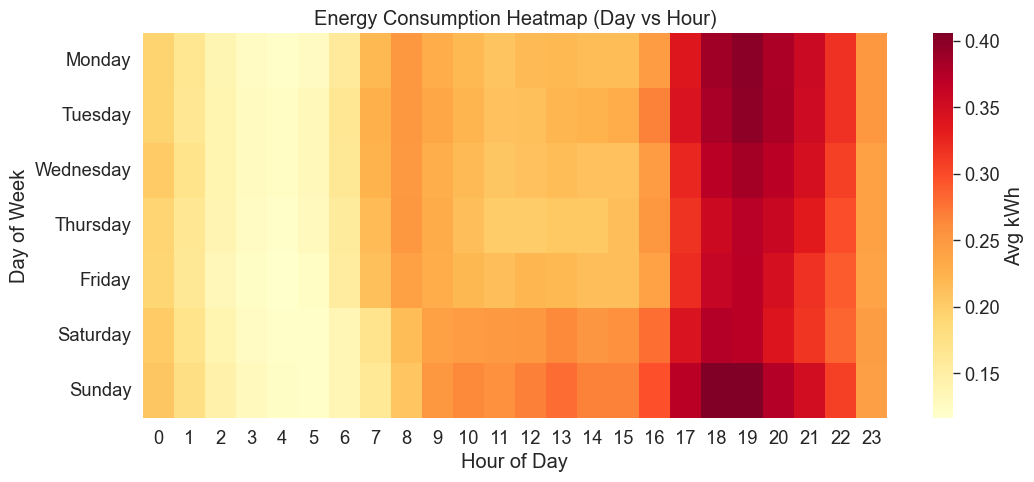

In [4]:
# Change DateTime type to datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Extract hour and minutes
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
# Create a "Time" float for plotting (e.g., 18.5 for 18:30)
df['Time_Float'] = df['Hour'] + df['Minute']/60
df['Day_Name'] = df['DateTime'].dt.day_name()

# PLOT 4: AVERAGE DAILY LOAD PROFILE
plt.figure(figsize=(10, 6))

# Seaborn automatically calculates the Mean and draws a 95% Confidence Interval (shadow)
# It groups all rows that share the same Time_Float 
# and for each time of the day, Seaborn computes the mean energy consumption (and the confidence interval)
sns.lineplot(data=df, x='Time_Float', y='KWH/hh (per half hour) ', color="#e67e22", linewidth=2)

plt.title("Average Daily Energy Consumption Profile")
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Avg Consumption (kWh)")
plt.xticks(range(0, 25, 2)) # Show every 2nd hour on the graph
plt.grid(True)
plt.xlim(0, 24) # show values between 0 and 24

plt.savefig(f"{SAVE_PATH}distribution_daily_profile.png", dpi=300, bbox_inches='tight')
plt.show()


# ---- PLOT 5: Unique Values over Time
# This calculates: How many distinct numbers appeared at each timestamp?

# Group all rows by DateTime, then select the energy consumption column 
# and count how many different values appear at that timestamp
# DateTime is index after those operations, thereby I call reset_index
uniqueness = df.groupby('DateTime')['KWH/hh (per half hour) '].nunique().reset_index()
# Convert the timestamp into a float for plotting purposes
uniqueness['Time_Float'] = uniqueness['DateTime'].dt.hour + uniqueness['DateTime'].dt.minute/60

plt.figure(figsize=(10, 6))

sns.lineplot(data=uniqueness, x='Time_Float', y='KWH/hh (per half hour) ', color="#8e44ad")

plt.title("Sparsity Analysis: Count of Unique Values per Timestamp")
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Unique Values (Max ~5500)")
plt.xticks(range(0, 25, 2))
plt.grid(True)
plt.xlim(0, 24)

plt.savefig(f"{SAVE_PATH}distribution_sparsity.png", dpi=300, bbox_inches='tight')
plt.show()


# ---- PLOT 6: HEATMAP (Consumption Intensity)
# The pivot table structure: Rows=Day, Cols=Hour, Values=Mean Energy
heatmap_data = df.pivot_table(index='Day_Name', columns='Hour', values='KWH/hh (per half hour) ', aggfunc='mean')

# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Avg kWh'})

plt.title("Energy Consumption Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

plt.savefig(f"{SAVE_PATH}distribution_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()